# **Survival prediction of Gladiator** 

### Data discretization and Data cleaning

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("gladiator.csv")
# df=df.head(100)

df["Survived"] = df["Survived"].astype(int)  #made the survive column into int from bool

x=df.duplicated()
print("Duplicated entries:",df[x==True])                           #"NO duplicate entries found"
df.drop_duplicates(inplace=True)


# for col in df.columns:

#   # Checking if the column contains
#   # any null values
#   if df[col].isnull().sum() > 0:
#     val = df[col].mean()
#     df[col] = df[col].fillna(val)

# df.isnull().sum().sum()


# print(df.isnull())                                  #"NO NULL values in the data"
df.dropna(inplace=True)
 
x= pd.cut(df["Age"],bins=5).value_counts()        #equal_width_binning
print(x,end='\n\n')
                                                    
x=pd.qcut(df["Age"],q=3).value_counts()           #equal_freq_binning
print(x,end='\n\n')
                                              
df.drop("Birth Year",axis=1,inplace=True)   #droping birth column beacuse age is there

df.drop(["Social Standing","Name","Category","Origin","Allegiance Network","Psychological Profile","Personal Motivation","Previous Occupation","Crowd Appeal Techniques"],axis=1,inplace=True)
                                           #droping columns beacuse irrelevant data
df

Duplicated entries: Empty DataFrame
Columns: [Name, Age, Birth Year, Origin, Height, Weight, Category, Wins, Losses, Special Skills, Weapon of Choice, Patron Wealth, Equipment Quality, Public Favor, Injury History, Mental Resilience, Diet and Nutrition, Tactical Knowledge, Allegiance Network, Battle Experience, Psychological Profile, Health Status, Personal Motivation, Previous Occupation, Training Intensity, Battle Strategy, Social Standing, Crowd Appeal Techniques, Survived]
Index: []

[0 rows x 29 columns]
Age
(28.8, 34.2]      23142
(39.6, 45.0]      23037
(17.973, 23.4]    22764
(23.4, 28.8]      19436
(34.2, 39.6]      19085
Name: count, dtype: int64

Age
(17.999, 27.0]    38253
(27.0, 36.0]      34825
(36.0, 45.0]      34386
Name: count, dtype: int64



,Age,Height,Weight,Wins,Losses,Special Skills,Weapon of Choice,Patron Wealth,Equipment Quality,Public Favor,Injury History,Mental Resilience,Diet and Nutrition,Tactical Knowledge,Battle Experience,Health Status,Training Intensity,Battle Strategy,Survived
0,21,180,74,4,1,Novice,Dagger,Medium,Standard,0.541856,Low,5.716806,Adequate,Intermediate,5,Excellent,Medium,Balanced,0
1,36,174,80,10,2,Novice,Sica (Curved Sword),Medium,Standard,0.801271,Low,4.020047,Adequate,Basic,12,Excellent,Medium,Balanced,1
2,29,157,94,6,2,Speed,Spear,Medium,Standard,0.737909,Low,5.114517,Adequate,Expert,8,Excellent,Medium,Aggressive,1
3,21,177,72,7,1,Tactics,Sica (Curved Sword),Medium,Standard,0.816936,Low,7.665372,Adequate,Advanced,8,Excellent,Medium,Aggressive,1
4,26,178,104,5,0,Novice,Dagger,Medium,Standard,0.637143,Low,8.906909,Adequate,Intermediate,5,Excellent,Medium,Aggressive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107459,24,172,61,3,0,Speed,Dagger,Low,Basic,0.511769,Low,3.637756,Poor,Advanced,3,Excellent,Medium,Aggressive,0
107460,44,167,71,15,5,Strength,Dagger,Low,Basic,0.871124,High,1.000420,Poor,Advanced,20,Fair,Medium,Balanced,0
107461,31,161,87,9,1,Novice,Dagger,High,Superior,0.759733,Low,6.015027,Excellent,Intermediate,10,Excellent,Medium,Aggressive,1
107462,43,168,81,9,4,Endurance,Spear,Medium,Standard,0.614937,Low,5.291083,Adequate,Advanced,13,Good,Low,Balanced,0


values counts

In [209]:
x=pd.DataFrame()
for i in df.columns:
   x=pd.concat([pd.DataFrame(df[i].value_counts()).reset_index(),x],axis=1) #getting all the unique values counts of all columns in a df
x.to_csv("unique_values.csv") 
x
# df['Patron Wealth'].unique()

,Survived,count,Battle Strategy,count,Training Intensity,count,Health Status,count,Battle Experience,count,...,Losses,count,Wins,count,Weight,count,Height,count,Age,count
0,0.0,54584.0,Balanced,57084.0,Medium,71399.0,Excellent,69426.0,8.0,9531.0,...,1.0,31540.0,7.0,12526.0,83.0,2732.0,175.0,4296.0,27.0,3989.0
1,1.0,52880.0,Aggressive,40427.0,Low,26867.0,Good,29210.0,9.0,9367.0,...,0.0,26852.0,6.0,11949.0,79.0,2687.0,176.0,4240.0,28.0,3947.0
2,NaN,NaN,Defensive,9953.0,High,9198.0,Fair,8828.0,7.0,9238.0,...,2.0,21241.0,8.0,11723.0,82.0,2672.0,173.0,4180.0,26.0,3920.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,8717.0,...,3.0,12746.0,5.0,10664.0,80.0,2648.0,174.0,4175.0,30.0,3916.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8538.0,...,4.0,7282.0,9.0,10593.0,81.0,2644.0,177.0,4121.0,36.0,3912.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


histograms for different features

### Outlier Detection using Histogram

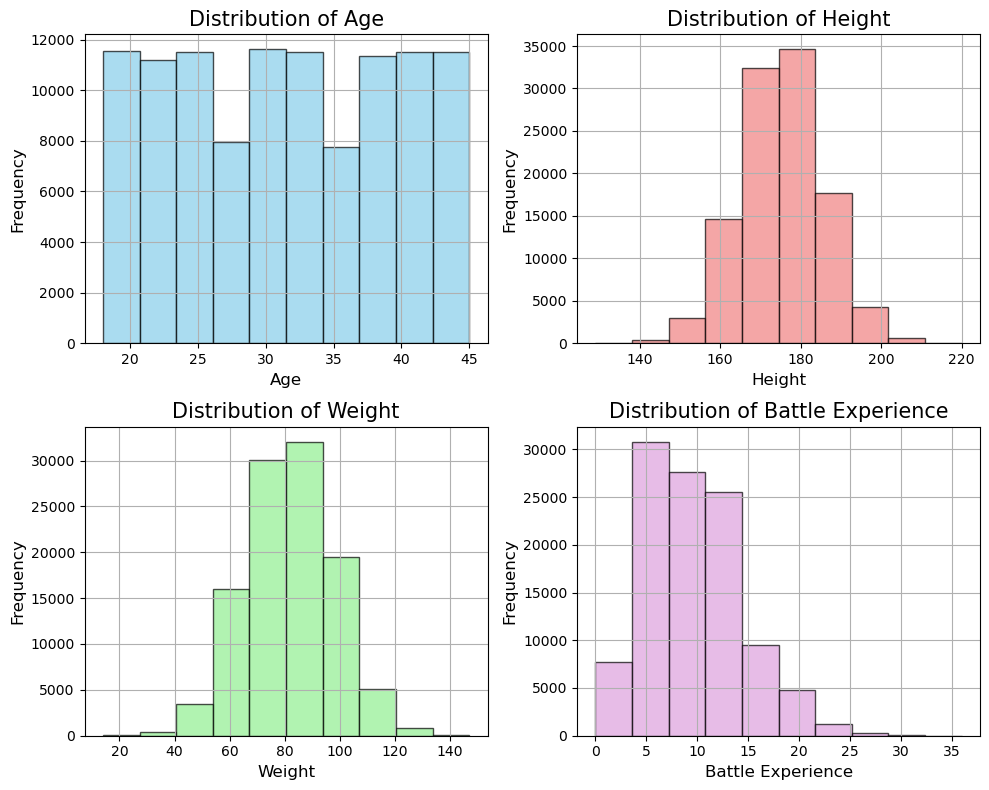

In [212]:
figs, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

df["Age"].hist(bins=10, color='skyblue', edgecolor='black', alpha=0.7, ax=axs[0, 0])   #histogram of age 
axs[0, 0].set_xlabel('Age', fontsize=12)
axs[0, 0].set_ylabel('Frequency', fontsize=12)
axs[0, 0].set_title('Distribution of Age', fontsize=15)

df["Height"].hist(bins=10, color='lightcoral', edgecolor='black', alpha=0.7, ax=axs[0, 1])  #histogram of height 
axs[0, 1].set_xlabel('Height', fontsize=12)
axs[0, 1].set_ylabel('Frequency', fontsize=12)
axs[0, 1].set_title('Distribution of Height', fontsize=15)

df["Weight"].hist(bins=10, color='lightgreen', edgecolor='black', alpha=0.7, ax=axs[1, 0])   #histogram of weight 
axs[1, 0].set_xlabel('Weight', fontsize=12)
axs[1, 0].set_ylabel('Frequency', fontsize=12)
axs[1, 0].set_title('Distribution of Weight', fontsize=15)

df["Battle Experience"].hist(bins=10, color='plum', edgecolor='black', alpha=0.7, ax=axs[1, 1])   #histogram of Battle Experience 
axs[1, 1].set_xlabel('Battle Experience', fontsize=12)
axs[1, 1].set_ylabel('Frequency', fontsize=12)
axs[1, 1].set_title('Distribution of Battle Experience', fontsize=15)

plt.tight_layout()


scatter plots

### Outlier Detection using Scatter plot

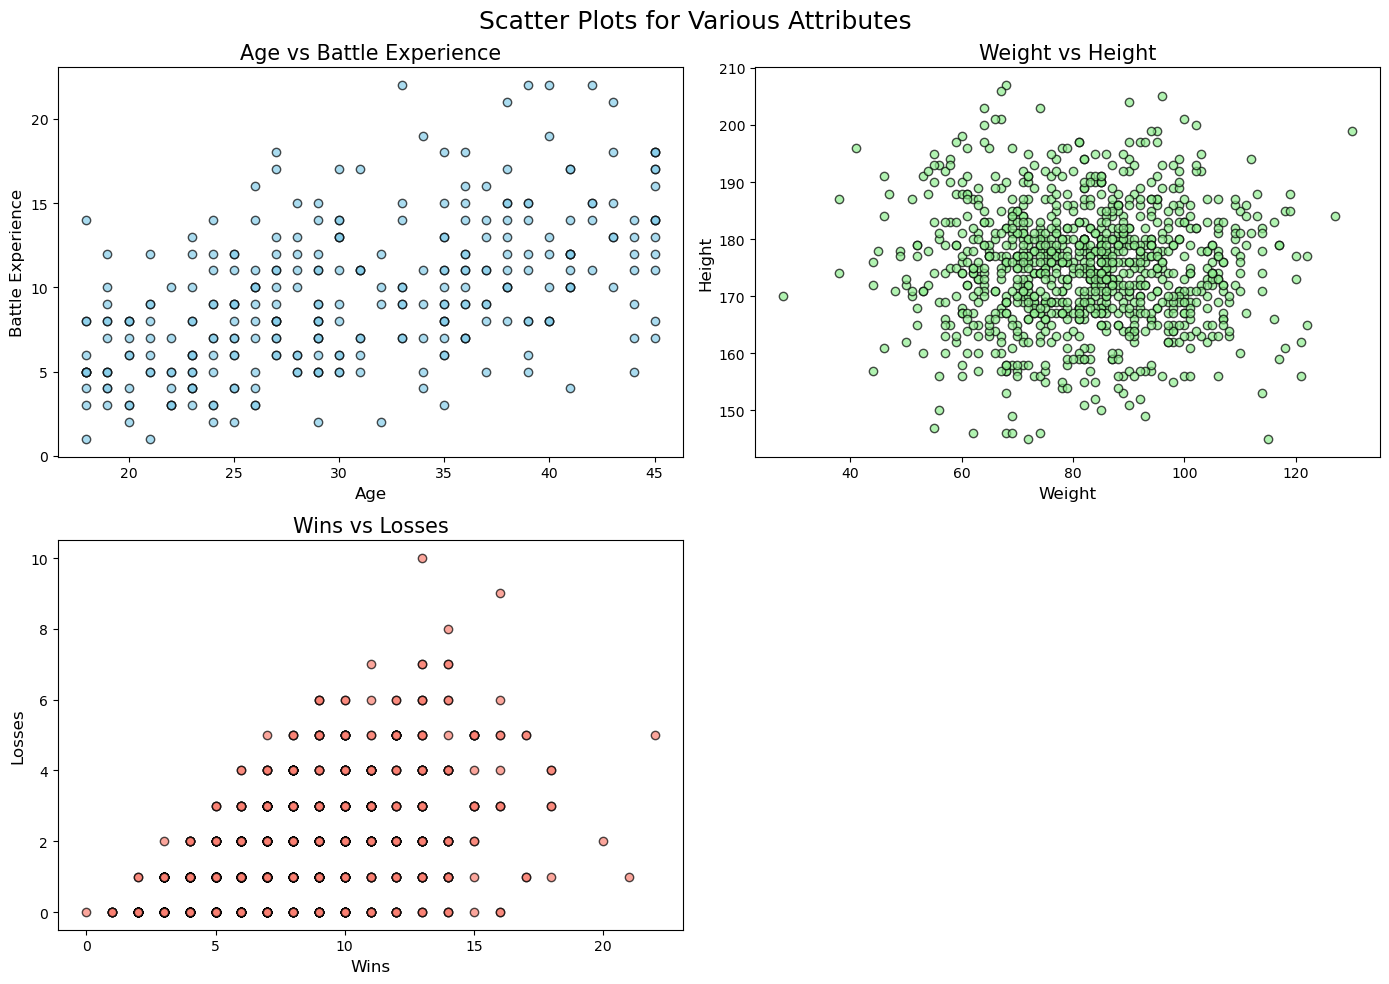

In [215]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle("Scatter Plots for Various Attributes", fontsize=18)

# Scatter plot for Age vs Battle Experience
axs[0, 0].scatter(df['Age'].head(300), df['Battle Experience'].head(300), color='skyblue', edgecolor='black', alpha=0.7)
axs[0, 0].set_xlabel('Age ', fontsize=12)
axs[0, 0].set_ylabel('Battle Experience', fontsize=12)
axs[0, 0].set_title('Age vs Battle Experience', fontsize=15)

# Scatter plot for Weight vs Height
axs[0, 1].scatter(df['Weight'].head(1000), df['Height'].head(1000), color='lightgreen', edgecolor='black', alpha=0.7)
axs[0, 1].set_xlabel('Weight', fontsize=12)
axs[0, 1].set_ylabel('Height', fontsize=12)
axs[0, 1].set_title('Weight vs Height', fontsize=15)

# Scatter plot for Wins vs Losses
axs[1, 0].scatter(df['Wins'].head(1000), df['Losses'].head(1000), color='salmon', edgecolor='black', alpha=0.7)
axs[1, 0].set_xlabel('Wins', fontsize=12)
axs[1, 0].set_ylabel('Losses', fontsize=12)
axs[1, 0].set_title('Wins vs Losses', fontsize=15)

# Hide the unused subplot (bottom-right)
axs[1, 1].axis('off')
plt.tight_layout()

### Outlier Detection using BOXPLOT

No of outliners removed: 2651


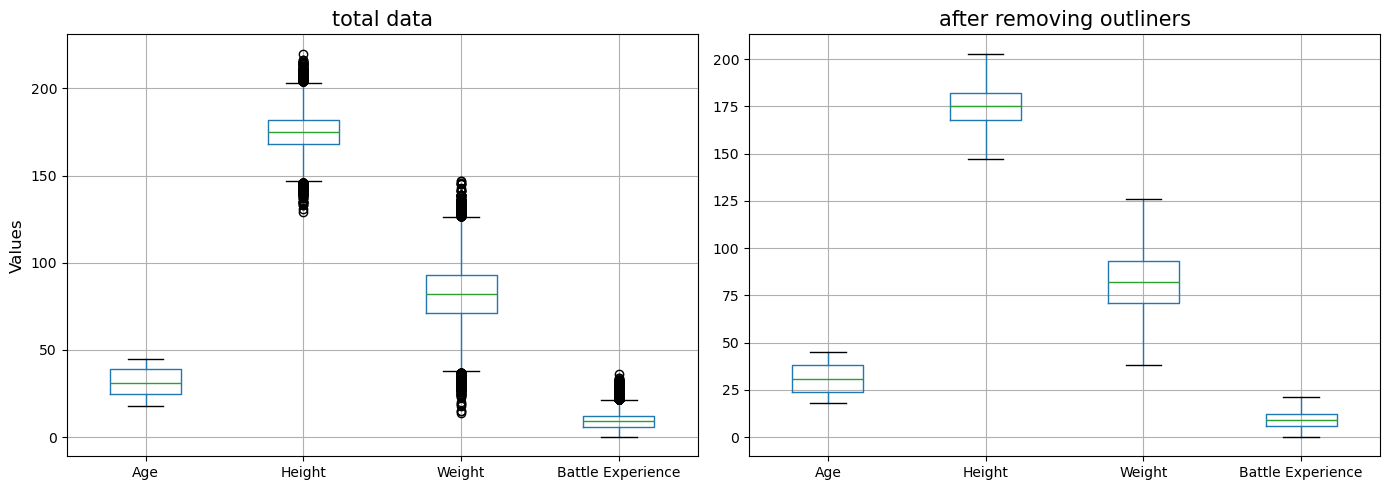

In [217]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

df[['Age', 'Height', 'Weight', 'Battle Experience']].boxplot(ax=axes[0])
axes[0].set_title('total data', fontsize=15)
axes[0].set_ylabel('Values', fontsize=12)
prev_len=len(df)

for column in ['Age', 'Height', 'Weight', 'Battle Experience']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR =Q3-Q1
    lower_bound =Q1-1.5*IQR
    upper_bound =Q3+1.5*IQR
    df=df[(df[column]>=lower_bound)&(df[column]<=upper_bound)]
    
df=df.reset_index().drop("index",axis=1)
print("No of outliners removed:",prev_len-len(df))

df[['Age', 'Height', 'Weight', 'Battle Experience']].boxplot(ax=axes[1])
axes[1].set_title('after removing outliners', fontsize=15)
axes[0].set_ylabel('Values', fontsize=12)
plt.tight_layout()



Onehotencoding

### ONE HOT ENCODER

In [220]:
from sklearn.preprocessing import OneHotEncoder

onehot=OneHotEncoder()

matrix = onehot.fit_transform(df[['Special Skills']])
matrix_df=pd.DataFrame(matrix.toarray(),columns=df['Special Skills'].unique())
df1=df.drop("Special Skills",axis=1)
df=pd.concat([df1,matrix_df],axis=1)

matrix = onehot.fit_transform(df[['Weapon of Choice']])
matrix_df=pd.DataFrame(matrix.toarray(),columns=df['Weapon of Choice'].unique())
df1=df.drop("Weapon of Choice",axis=1)
df=pd.concat([df1,matrix_df],axis=1)


matrix = onehot.fit_transform(df[['Patron Wealth']])
columns=[]
for i in df['Patron Wealth'].unique():   #changing the name of columns for one hot encoding
    columns.append(i+"_pw")
matrix_df=pd.DataFrame(matrix.toarray(),columns=columns)
df1=df.drop("Patron Wealth",axis=1)
df=pd.concat([df1,matrix_df],axis=1)

matrix = onehot.fit_transform(df[['Equipment Quality']])
matrix_df=pd.DataFrame(matrix.toarray(),columns=df['Equipment Quality'].unique())
df1=df.drop("Equipment Quality",axis=1)
df=pd.concat([df1,matrix_df],axis=1)

matrix = onehot.fit_transform(df[['Injury History']])
columns=[]
for i in df['Injury History'].unique():   #changing the name of columns for one hot encoding
    columns.append(i+"_ih")
matrix_df=pd.DataFrame(matrix.toarray(),columns=columns)
df1=df.drop("Injury History",axis=1)
df=pd.concat([df1,matrix_df],axis=1)

matrix = onehot.fit_transform(df[['Diet and Nutrition']])
matrix_df=pd.DataFrame(matrix.toarray(),columns=df['Diet and Nutrition'].unique())
df1=df.drop("Diet and Nutrition",axis=1)
df=pd.concat([df1,matrix_df],axis=1)

matrix = onehot.fit_transform(df[['Tactical Knowledge']])
matrix_df=pd.DataFrame(matrix.toarray(),columns=df['Tactical Knowledge'].unique())
df1=df.drop("Tactical Knowledge",axis=1)
df=pd.concat([df1,matrix_df],axis=1)

matrix = onehot.fit_transform(df[['Health Status']])
columns=[]
for i in df['Health Status'].unique():   #changing the name of columns for one hot encoding
    columns.append(i+"_hs")
matrix_df=pd.DataFrame(matrix.toarray(),columns=columns)
df1=df.drop("Health Status",axis=1)
df=pd.concat([df1,matrix_df],axis=1)

matrix = onehot.fit_transform(df[['Training Intensity']])
columns=[]
for i in df['Training Intensity'].unique():   #changing the name of columns for one hot encoding
    columns.append(i+"_ti")
matrix_df=pd.DataFrame(matrix.toarray(),columns=columns)
df1=df.drop("Training Intensity",axis=1)
df=pd.concat([df1,matrix_df],axis=1)

matrix = onehot.fit_transform(df[['Battle Strategy']])
columns=[]
for i in df['Battle Strategy'].unique():   #changing the name of columns for one hot encoding
    columns.append(i+"_bs")
matrix_df=pd.DataFrame(matrix.toarray(),columns=columns)
df1=df.drop("Battle Strategy",axis=1)
df=pd.concat([df1,matrix_df],axis=1)
    
df.to_csv("temp.csv")
df



,Age,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Survived,Novice,...,Advanced,Excellent_hs,Good_hs,Fair_hs,Medium_ti,Low_ti,High_ti,Balanced_bs,Aggressive_bs,Defensive_bs
0,21,180,74,4,1,0.541856,5.716806,5,0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,36,174,80,10,2,0.801271,4.020047,12,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,29,157,94,6,2,0.737909,5.114517,8,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,21,177,72,7,1,0.816936,7.665372,8,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,26,178,104,5,0,0.637143,8.906909,5,1,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104808,24,172,61,3,0,0.511769,3.637756,3,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
104809,44,167,71,15,5,0.871124,1.000420,20,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
104810,31,161,87,9,1,0.759733,6.015027,10,1,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
104811,43,168,81,9,4,0.614937,5.291083,13,0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


## Data Normalization 

,Age,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Novice,Speed,Tactics,...,Advanced,Excellent_hs,Good_hs,Fair_hs,Medium_ti,Low_ti,High_ti,Balanced_bs,Aggressive_bs,Defensive_bs
0,-1.291527,0.476218,-0.508408,-1.138243,-0.429451,-1.122212,0.501799,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.575282,-0.129776,-0.125311,0.687562,0.211755,0.773744,-0.229397,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.295895,-1.846762,0.768584,-0.529641,0.211755,0.310659,0.242251,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,-1.291527,0.173221,-0.636107,-0.225341,-0.429451,0.888231,1.341508,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,-0.669257,0.274220,1.407080,-0.833942,-1.070658,-0.425799,1.876532,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104808,-0.918165,-0.331775,-1.338453,-1.442544,-1.070658,-1.342107,-0.394140,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
104809,1.570914,-0.836771,-0.699957,2.209066,2.135376,1.284269,-1.530665,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
104810,-0.046987,-1.442766,0.321637,0.383261,-0.429451,0.470157,0.630314,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
104811,1.446460,-0.735771,-0.061461,0.383261,1.494169,-0.588095,0.318339,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


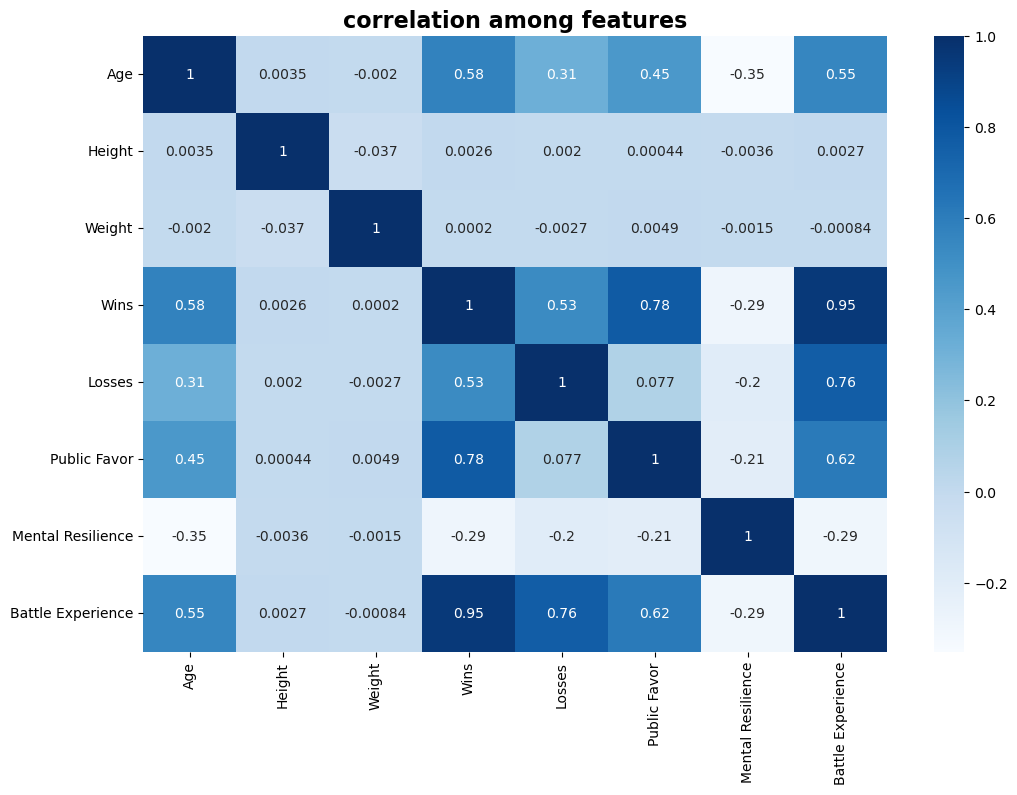

In [222]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df[df.columns[0:8]]),columns=df.columns[0:8])  #standardizing only non onehot columns
df_standardized2 = pd.DataFrame(scaler.fit_transform(df.drop("Survived",axis=1)),columns=df.drop("Survived",axis=1).columns) #standardizing all columns


import seaborn as sns
plt.figure(figsize=(12, 8))                                         # Create a heatmap
sns.heatmap(df_standardized.corr(),annot=True,cmap='Blues')        #calculating correlation of columns
plt.title("correlation among features", fontsize=16, weight='bold')

df_standardized.drop("Battle Experience",inplace=True,axis=1)   #Battle experience is highly correlated to wins
df_standardized2.drop("Battle Experience",inplace=True,axis=1)
df_standardized=pd.concat([df_standardized,df.drop(df.columns[0:9],axis=1)],axis=1)

df_standardized

## Dimensionality Reduction - Principal Component Analysis

In [224]:
from sklearn.decomposition import PCA

# pca=PCA(n_components=20)

# pca_df1=pd.DataFrame(pca.fit_transform(df_standardized))
# pca_df2=pd.DataFrame(pca.fit_transform(df_standardized2))



W=df_standardized.cov()
eigenval,eigenvec=np.linalg.eig(W.values)
inde=eigenval.argsort()
eigenval=eigenval[inde]
eigenval=eigenval[::-1]    #considers the top 20 of eigen values
eigenvec=eigenvec[inde]
eigenvec=eigenvec[0:20]
W=eigenvec

pca_df1=np.dot(df_standardized,W.transpose())


W=df_standardized2.cov()
eigenval,eigenvec=np.linalg.eig(W.values)
inde=eigenval.argsort()
eigenval=eigenval[inde]
eigenval=eigenval[::-1]  
eigenvec=eigenvec[inde]
eigenvec=eigenvec[0:20]
W=eigenvec

pca_df2=np.dot(df_standardized2,W.transpose())
pd.DataFrame(pca_df2)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.739129,0.174043,0.668571,2.426460,-0.599542,0.528930,0.239433,0.911652,0.736148,0.467200,0.234498,-0.100289,-0.669566,-0.354307,-0.176534,0.397147,0.623174,-1.085133,1.027884,-0.004344
1,-0.527892,-0.273162,1.180384,-0.270893,-0.668024,0.226886,0.456157,0.875746,0.821021,0.426163,-0.504810,-0.377281,0.153779,-1.065928,0.544158,0.566136,0.725141,-0.083532,0.647788,1.680398
2,-1.115220,0.066548,0.691949,0.095042,0.950509,-0.419789,-0.963865,-0.400448,0.770892,1.009464,-1.319660,-2.673135,-0.232137,-0.622293,-0.717507,0.324732,-2.296026,-0.742437,0.967611,1.261852
3,-0.334158,-0.613643,1.046757,-0.148598,0.846914,-0.240502,-1.033940,-0.434990,0.330784,0.334444,0.537699,-1.648683,-0.216184,2.587632,-1.839858,0.380866,0.239682,0.418453,0.706979,1.914857
4,-0.786456,0.104825,0.745324,2.194570,0.208065,-0.309547,-1.058512,-0.370402,0.478189,0.621846,0.509022,-0.451508,-0.522651,-0.439848,-0.945854,0.845498,0.894713,-0.948661,0.982621,0.002030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104808,0.310093,1.499758,0.398462,-0.021142,-0.426341,-0.671368,-1.002538,-0.208702,0.440768,-0.654958,1.883269,-0.890923,-0.601483,1.163210,-1.799253,0.505854,-0.648939,-0.360580,0.779158,-0.389527
104809,-0.915534,-0.446994,-0.123401,-2.272264,-0.089061,-0.788997,0.754795,1.101832,1.074059,-0.285456,0.147008,1.342672,-0.683978,-0.405613,0.556351,-0.648161,-1.418226,4.074833,-0.324313,-3.223900
104810,-0.028203,-0.337711,-0.938895,1.705240,-0.213074,-0.654749,-0.883741,-0.342271,0.712841,0.390176,0.466289,0.406363,1.339906,-0.650038,-0.693814,0.332001,0.388279,-0.344756,-0.404594,-0.544527
104811,-1.390471,1.190245,0.733453,0.318134,1.112544,0.134180,2.571197,-1.260898,-0.693431,-0.313603,-3.350312,-0.675261,-0.110023,0.490987,0.938780,-0.169900,-2.251685,0.605072,0.759522,0.149571


## Linear Discriminant Analysis

In [226]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df_standardized  # Features
y = df['Survived']  # Target
lda = LinearDiscriminantAnalysis(n_components=1)  # Initialize the LDA model
                                                  # We choose 1 components for dimensionality reduction 
                                                  #since:n_components cannot be larger than min(n_features, n_classes - 1).

df_lda1=pd.DataFrame(lda.fit_transform(X, y), columns=["lda_column"]) # Fit the model and transform the features

X = df_standardized2 
df_lda2=pd.DataFrame(lda.fit_transform(X, y), columns=["lda_column"]) 

df_lda1

,lda_column
0,-0.976745
1,0.752144
2,-0.230352
3,1.199804
4,0.875154
...,...
104808,-2.251390
104809,-0.567339
104810,1.744517
104811,-0.382241


## Classification using KNN

In [228]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = df_standardized
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

knn = KNeighborsClassifier(n_neighbors=10) # Create a KNN classifier

knn.fit(X_train, y_train)                  # Train the classifier
y_pred = knn.predict(X_test)                # Make predictions on the test set
accuracy = accuracy_score(y_test, y_pred)                  # Calculate and print the accuracy
print("Accuracy using just normalised data(not including one hot):",round(accuracy,2))


X = df_standardized2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

knn = KNeighborsClassifier(n_neighbors=10) # Create a KNN classifier

knn.fit(X_train, y_train)                  # Train the classifier
y_pred = knn.predict(X_test)                # Make predictions on the test set
accuracy = accuracy_score(y_test, y_pred)                  # Calculate and print the accuracy
print("Accuracy using just normalised data(including one hot):",round(accuracy,2))


X = pca_df1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

knn = KNeighborsClassifier(n_neighbors=10) # Create a KNN classifier

knn.fit(X_train, y_train)                  # Train the classifier
y_pred = knn.predict(X_test)                # Make predictions on the test set
accuracy = accuracy_score(y_test, y_pred)                  # Calculate and print the accuracy
print("Accuracy using PCA of normalised data(not including one hot):",round(accuracy,2))


X = pca_df2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

knn = KNeighborsClassifier(n_neighbors=10) # Create a KNN classifier

knn.fit(X_train, y_train)                  # Train the classifier
y_pred = knn.predict(X_test)                # Make predictions on the test set
accuracy = accuracy_score(y_test, y_pred)                  # Calculate and print the accuracy
print("Accuracy using PCA of normalised data(including one hot):",round(accuracy,2))


X = df_lda1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

knn = KNeighborsClassifier(n_neighbors=10) # Create a KNN classifier

knn.fit(X_train, y_train)                  # Train the classifier
y_pred = knn.predict(X_test)                # Make predictions on the test set
accuracy = accuracy_score(y_test, y_pred)                  # Calculate and print the accuracy
print("Accuracy using lda of normalised data(not including one hot):",round(accuracy,2))


X = df_lda2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

knn = KNeighborsClassifier(n_neighbors=10) # Create a KNN classifier

knn.fit(X_train, y_train)                  # Train the classifier
y_pred = knn.predict(X_test)                # Make predictions on the test set
accuracy = accuracy_score(y_test, y_pred)                  # Calculate and print the accuracy
print("Accuracy using lda of normalised data(including one hot):",round(accuracy,2))




Accuracy using just normalised data(not including one hot): 0.81
Accuracy using just normalised data(including one hot): 0.74
Accuracy using PCA of normalised data(not including one hot): 0.75
Accuracy using PCA of normalised data(including one hot): 0.76
Accuracy using lda of normalised data(not including one hot): 0.82
Accuracy using lda of normalised data(including one hot): 0.82


## Confusion matrix

<Axes: >

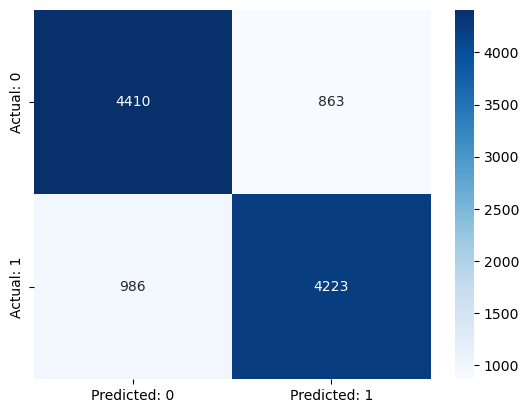

In [230]:
from sklearn.metrics import confusion_matrix

cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['Actual: 0', 'Actual: 1'], columns=['Predicted: 0', 'Predicted: 1'])# Generate confusion matrix

sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
